## STA7722 Assignment1 Part B 2.1

### a.Plot the likelihood values for a normal distribution with data x = [2.3, 2.5, 2.4, 2.0, 1.9, 2.3]. Use values for mu = [1.5,1.75,2.0, 2.25, 2.5], and for the variance [0.02, 0.04, 0.06, 0.08].
### b. Obtain the parameter values for the distribution using the equations derived in class for the maximum likelihood estimates.
### c.Find the optimal using grid search.
### d. Using log likelihood to do the same tasks above.


### Solutions:
### a.Plot the likelihood values

### The likelihood function for normal distribution is 
$L(\mu,\sigma;x_1,\dots,x_n) = (2\pi\sigma^2)^{-n/2} exp \left(\frac{1}{2\sigma^2}\sum_{i = 1 }^{n}(x_i - \mu)^2\right)$

In [112]:
import Pkg
Pkg.add("PyPlot")


In [115]:
#Using PyPlot
using StatsBase;
using PyPlot;

In [122]:
#Define parameters
x = [2.3, 2.5, 2.4, 2.0, 1.9, 2.3]

mu = [1.5, 1.75, 2.0, 2.25, 2.5]
va = [0.02, 0.04, 0.06, 0.08]

c=[[i,j] for i in mu for j in va]
t=hcat(c...)'


20×2 adjoint(::Matrix{Float64}) with eltype Float64:
 1.5   0.02
 1.5   0.04
 1.5   0.06
 1.5   0.08
 1.75  0.02
 1.75  0.04
 1.75  0.06
 1.75  0.08
 2.0   0.02
 2.0   0.04
 2.0   0.06
 2.0   0.08
 2.25  0.02
 2.25  0.04
 2.25  0.06
 2.25  0.08
 2.5   0.02
 2.5   0.04
 2.5   0.06
 2.5   0.08

In [123]:
#define likelihood function          
function lnorm(par)
    l=Matrix(undef,length(par[:,1]),3)
    for i = 1:length(par[:,1])
                l[i,1]= par[i,1]
                l[i,2]= par[i,2]
                l[i,3]=(2pi*par[i,2])^(-length(x)/2)*exp(-1/(2par[i,2])*sum((x.-par[i,1]).^2))
    end
    return l                            
end

l=lnorm(t) 


20×3 Matrix{Any}:
 1.5   0.02  5.03041e-36
 1.5   0.04  6.29357e-18
 1.5   0.06  4.01869e-12
 1.5   0.08  2.48885e-9
 1.75  0.02  3.28314e-16
 1.75  0.04  5.0844e-8
 1.75  0.06  1.618e-5
 1.75  0.08  0.000223702
 2.0   0.02  0.000154153
 2.0   0.04  0.0348395
 2.0   0.06  0.125758
 2.0   0.08  0.185177
 2.25  0.02  0.52071
 2.25  0.04  2.02485
 2.25  0.06  1.8869
 2.25  0.08  1.41171
 2.5   0.02  1.26537e-5
 2.5   0.04  0.00998168
 2.5   0.06  0.054654
 2.5   0.08  0.0991179

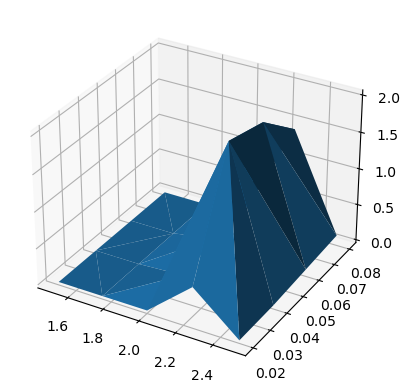

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000011E7100>

In [125]:
#plot
mu=l[:,1]
va=l[:,2]
likelihood=l[:,3]
surf(mu,va,likelihood) 


### b. The MLE for $\mu$ and $\sigma^2$ is: $\mu = \frac{(x_1+\dots + x_n)}{n}$; $\sigma^2 = \frac{(x_1- \mu)^2 + \dots + (x_n-\mu)^2}{n}$

In [126]:
mu1 = mean(x)
var1 = std(x)^2

0.054666666666666655

In [127]:
println("The MLE for mu  is $mu1")
println("The MLE for variance  is $var1")

The MLE for mu  is 2.233333333333333
The MLE for variance  is 0.054666666666666655


### c. Find the optimal using grid search

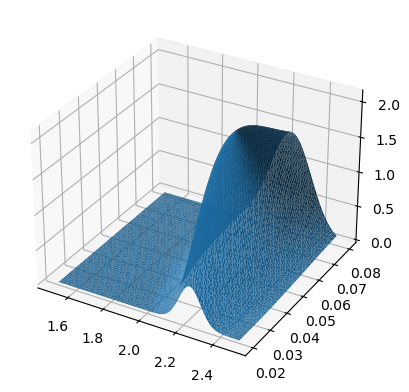

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000012270D0>

In [129]:
mu=collect(1.5:0.01:2.5)  #add more granular parameter space to search
va=collect(0.02:0.001:0.08) #add more granular parameter space to search
c=[[i,j] for i in mu for j in va]
t=hcat(c...)'
l=lnorm(t)
mu=l[:,1]
va=l[:,2]
likelihood=l[:,3]
surf(mu,va,likelihood)


In [130]:
#grid search output maximum
maxindex=argmax(l[:,3])
l[maxindex,1:2] 
mu=l[maxindex,1]
va=l[maxindex,2]
println("The maximum likelihood using grid search, we have mu $mu and  variance $va.")


The maximum likelihood using grid search, we have mu 2.23 and  variance 0.046.


### d. using log of the likelihood function

In [131]:
#log-likelihood
#Parameters
x=[2.3,2.5,2.4,2.0,1.9,2.3]
mu=collect(1.5:0.25:2.5)
va=collect(0.02:0.02:0.08)
c=[[i,j] for i in mu for j in va]
t=hcat(c...)'


20×2 adjoint(::Matrix{Float64}) with eltype Float64:
 1.5   0.02
 1.5   0.04
 1.5   0.06
 1.5   0.08
 1.75  0.02
 1.75  0.04
 1.75  0.06
 1.75  0.08
 2.0   0.02
 2.0   0.04
 2.0   0.06
 2.0   0.08
 2.25  0.02
 2.25  0.04
 2.25  0.06
 2.25  0.08
 2.5   0.02
 2.5   0.04
 2.5   0.06
 2.5   0.08

### The log likelihood function for normal distribution is 
$ln L(\mu,\sigma^2;x_1,\dots,x_n) = -\frac{n}{2}ln (2\pi) - \frac{n}{2}ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i = 1 }^{n}(x_i - \mu)^2$

In [132]:
#Define log likelihood        
function loglnorm(par)
    l=Matrix(undef,length(par[:,1]),3)
    for i = 1:length(par[:,1])
                l[i,1]= par[i,1]
                l[i,2]= par[i,2]
                  l[i,3]=(-length(x)/2)*log(2pi*par[i,2])-((1/(2par[i,2]))*sum((x.-par[i,1]).^2) )
    end
    return l                            
end
 
logl=loglnorm(t)


20×3 Matrix{Any}:
 1.5   0.02  -81.2776
 1.5   0.04  -39.607
 1.5   0.06  -26.2401
 1.5   0.08  -19.8114
 1.75  0.02  -35.6526
 1.75  0.04  -16.7945
 1.75  0.06  -11.0317
 1.75  0.08   -8.4052
 2.0   0.02   -8.77756
 2.0   0.04   -3.357
 2.0   0.06   -2.0734
 2.0   0.08   -1.68645
 2.25  0.02   -0.652562
 2.25  0.04    0.705496
 2.25  0.06    0.634934
 2.25  0.08    0.344805
 2.5   0.02  -11.2776
 2.5   0.04   -4.607
 2.5   0.06   -2.90673
 2.5   0.08   -2.31145

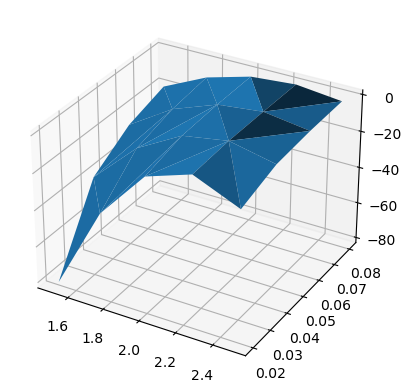

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000012634F0>

In [133]:
logl=loglnorm(t)
mu=logl[:,1]
va=logl[:,2]
loglikelihood=logl[:,3]
surf(mu,va,loglikelihood) 


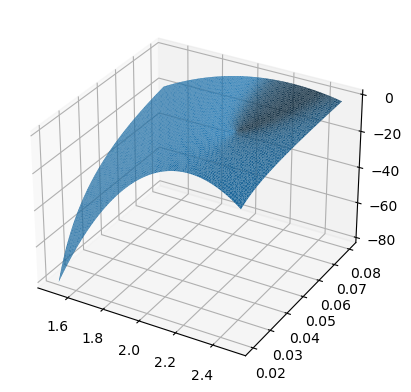

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000C15A4FD0>

In [134]:
#grid search log likelihood
mu=collect(1.5:0.01:2.5) #add more parameter space to search
va=collect(0.02:0.001:0.08) #add more parameter space to search
c=[[i,j] for i in mu for j in va]
t=hcat(c...)'

            
logl=loglnorm(t)
mu=logl[:,1]
va=logl[:,2]
loglikelihood=logl[:,3]
surf(mu,va,loglikelihood)


In [135]:
#grid search to fine out maximum
maxindex=argmax(logl[:,3])
mu=logl[maxindex,1]
va=logl[maxindex,2]
c=logl[maxindex,3]

println("The maximum log-likelihood is $c, mu is $mu,  variance is $va.")


The maximum log-likelihood is 0.7519713178163077, mu is 2.23,  variance is 0.046.


### Comment: 
1. Using MLE, likelihood and log likelihood function to find the parameter estiamte produce the same result of mu = 2.23 and similar variance 0.055, 0.046 and 0.046 respectively. Grid search by using likelihood and log likelihood function has the same parameter estimate.
2. Using log likelihood function is faster and more obvious to visualize the maximum than using likelihood function.
3. MLE doesn't require search since we can get the closed form estimate.